In [1]:
# Phase 4 Starter - Loading the feature dataset and splitiing for the train test set.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load full features
features_path = "../processed/full_features.csv"
full_df = pd.read_csv(features_path)

print("Full dataset shape:", full_df.shape)
full_df.head()

# Separate features and labels
X = full_df.drop(["label"], axis=1)
y = full_df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Full dataset shape: (100000, 10)
Training set shape: (70000, 9)
Test set shape: (30000, 9)


## Random Forest Classifier

Random Forest Classifier Report:
              precision    recall  f1-score   support

       Gluon       0.78      0.82      0.80     15000
       Quark       0.81      0.76      0.78     15000

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000

Confusion Matrix:
[[12237  2763]
 [ 3544 11456]]
ROC AUC Score: 0.8649


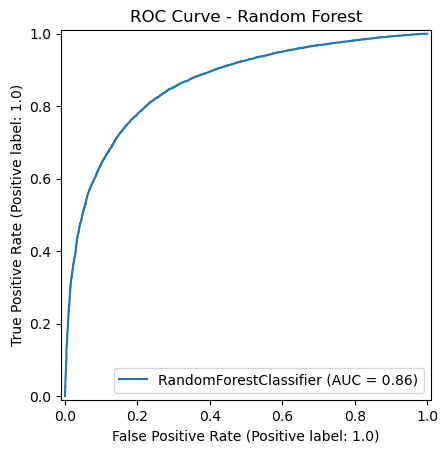

In [2]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# The model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # probability for ROC AUC

# Evaluate
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred, target_names=["Gluon", "Quark"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

Logistic Regression Report:
              precision    recall  f1-score   support

       Gluon       0.76      0.78      0.77     15000
       Quark       0.77      0.75      0.76     15000

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000

Confusion Matrix:
[[11695  3305]
 [ 3733 11267]]
ROC AUC Score: 0.8382


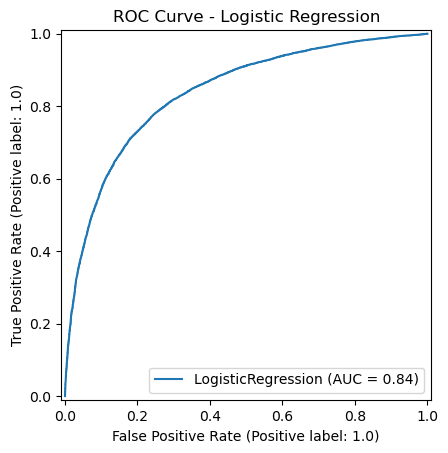

In [3]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# 1. Create the model
lr = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the model
lr.fit(X_train, y_train)

# 3. Predict
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Gluon", "Quark"]))

# 5. Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

# 6. ROC Curve
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC AUC Score: {roc_auc_lr:.4f}")

RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [4]:
# conda install -c conda-forge xgboost


/Users/sauravbania/opt/miniconda3/envs/project1/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:50:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Report:
              precision    recall  f1-score   support

       Gluon       0.78      0.80      0.79     15000
       Quark       0.80      0.77      0.78     15000

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000

Confusion Matrix:
[[12036  2964]
 [ 3446 11554]]
ROC AUC Score: 0.8613


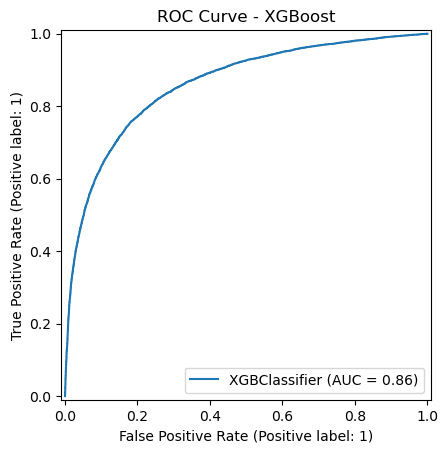

In [5]:
# XGBoost

import xgboost as xgb

# Create the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["Gluon", "Quark"]))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(cm_xgb)

# ROC Curve
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()

In [6]:
# # Support Vector Machine (SVM)

# from sklearn.svm import SVC

# # The model
# svm_model = SVC(probability=True, random_state=42)

# # Train
# svm_model.fit(X_train, y_train)

# # Predict
# y_pred_svm = svm_model.predict(X_test)
# y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# # Evaluate
# print("Support Vector Machine Report:")
# print(classification_report(y_test, y_pred_svm, target_names=["Gluon", "Quark"]))

# # Confusion Matrix
# cm_svm = confusion_matrix(y_test, y_pred_svm)
# print("Confusion Matrix:")
# print(cm_svm)

# # ROC Curve
# roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
# print(f"ROC AUC Score: {roc_auc_svm:.4f}")

# RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
# plt.title("ROC Curve - SVM")
# plt.show()

In [7]:
# conda install -c conda-forge lightgbm

In [8]:
# conda update -n base -c defaults conda

/Users/sauravbania/opt/miniconda3/envs/project1/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/sauravbania/opt/miniconda3/envs/project1/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[100]	train's binary_logloss: 0.438857	valid's binary_logloss: 0.456207
[200]	train's binary_logloss: 0.425208	valid's binary_logloss: 0.45591
Early stopping, best iteration is:
[186]	train's binary_logloss: 0.426871	valid's binary_logloss: 0.455766
LightGBM Test Accuracy: 0.7911
LightGBM Test AUC: 0.8668
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79     15000
         1.0       0.80      0.78      0.79     15000

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000



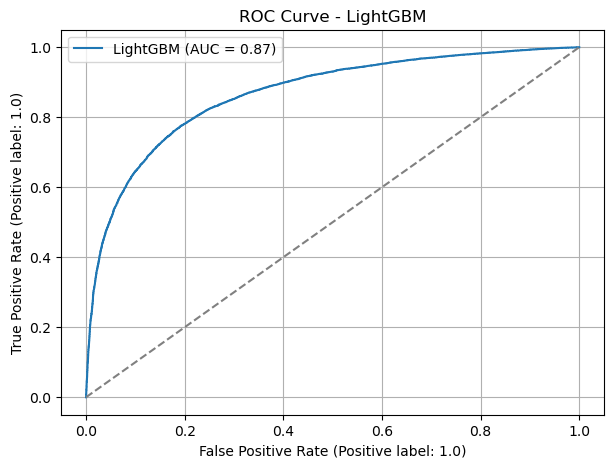

In [9]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Prepare LightGBM datasets
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test, reference=dtrain)

# Define parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# Train model with early stopping
lgb_model = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dtest],
    valid_names=["train", "valid"],
    num_boost_round=1000,
    early_stopping_rounds=50,
    verbose_eval=100
)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb_binary = (y_pred_lgb > 0.5).astype(int)

# Metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb_binary)
auc_lgb = roc_auc_score(y_test, y_pred_lgb)

print(f"LightGBM Test Accuracy: {accuracy_lgb:.4f}")
print(f"LightGBM Test AUC: {auc_lgb:.4f}")
print(classification_report(y_test, y_pred_lgb_binary))

from sklearn.metrics import roc_curve, auc

# LightGBM ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lgb)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (Positive label: 1.0)")
plt.ylabel("True Positive Rate (Positive label: 1.0)")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.grid()
plt.show()

AdaBoost Classifier Report:

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78     15000
         1.0       0.80      0.72      0.76     15000

    accuracy                           0.77     30000
   macro avg       0.78      0.77      0.77     30000
weighted avg       0.78      0.77      0.77     30000

Confusion Matrix:
[[12348  2652]
 [ 4141 10859]]
ROC AUC Score: 0.8497


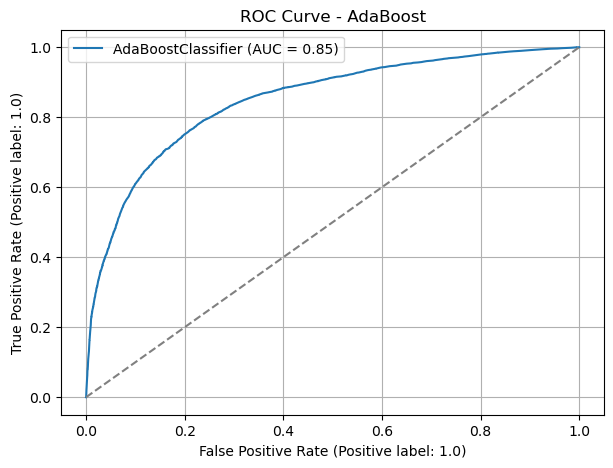

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc

# AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100)
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred = adaboost_model.predict(X_test)
y_pred_proba = adaboost_model.predict_proba(X_test)[:, 1]

# Evaluation
print("AdaBoost Classifier Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AdaBoostClassifier (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (Positive label: 1.0)")
plt.ylabel("True Positive Rate (Positive label: 1.0)")
plt.title("ROC Curve - AdaBoost")
plt.legend()
plt.grid()
plt.show()

In [11]:
# conda install -c conda-forge catboost

CatBoost Classifier Report:

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80     15000
         1.0       0.80      0.77      0.79     15000

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000

Confusion Matrix:
[[12162  2838]
 [ 3434 11566]]
ROC AUC Score: 0.8668


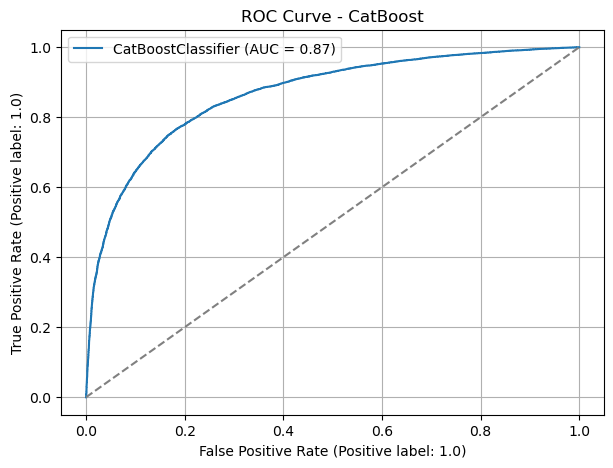

In [12]:
from catboost import CatBoostClassifier

# CatBoost model
catboost_model = CatBoostClassifier(verbose=0)  # silent training
catboost_model.fit(X_train, y_train)

# Predictions
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Evaluation
print("CatBoost Classifier Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"CatBoostClassifier (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (Positive label: 1.0)")
plt.ylabel("True Positive Rate (Positive label: 1.0)")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.grid()
plt.show()

## Model Comparison Summary

,Model,Accuracy,ROC AUC
0,Random Forest,0.79,0.865
1,Logistic Regression,0.77,0.838
2,XGBoost,0.79,0.861
3,LightGBM,0.79,0.867
4,CatBoost,0.79,0.867
5,AdaBoost,0.77,0.850
6,SVM,0.54,0.573


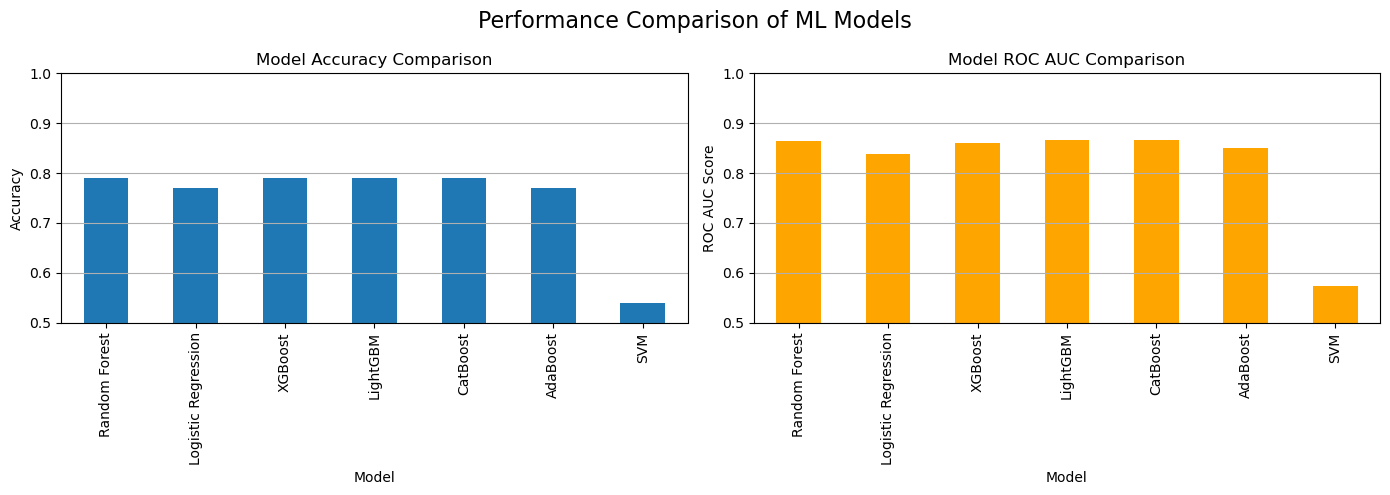

In [13]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Prepare model results
model_results = {
    "Model": [
        "Random Forest",
        "Logistic Regression",
        "XGBoost",
        "LightGBM",
        "CatBoost",
        "AdaBoost",
        "SVM"
    ],
    "Accuracy": [
        0.79,    # Random Forest
        0.77,    # Logistic Regression
        0.79,    # XGBoost
        0.79,    # LightGBM
        0.79,    # CatBoost
        0.77,    # AdaBoost
        0.54     # SVM
    ],
    "ROC AUC": [
        0.865,   # Random Forest
        0.838,   # Logistic Regression
        0.861,   # XGBoost
        0.867,   # LightGBM
        0.867,   # CatBoost
        0.850,   # AdaBoost
        0.573    # SVM
    ]
}

# Create DataFrame
model_df = pd.DataFrame(model_results)
display(model_df)

# Plot Accuracy and ROC AUC side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
model_df.plot(kind='bar', x='Model', y='Accuracy', ax=ax[0], legend=False)
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5, 1.0)
ax[0].grid(axis='y')

# ROC AUC
model_df.plot(kind='bar', x='Model', y='ROC AUC', ax=ax[1], color='orange', legend=False)
ax[1].set_title('Model ROC AUC Comparison')
ax[1].set_ylabel('ROC AUC Score')
ax[1].set_ylim(0.5, 1.0)
ax[1].grid(axis='y')

plt.suptitle('Performance Comparison of ML Models', fontsize=16)
plt.tight_layout()
plt.show()


# Plan

##  Phase 4: Reanalysis Using Jet Substructure Features

## 1. Introduction
- Why we are doing Phase 4
- What additional features we added (entropy, tau variables)

## 2. Feature Engineering Summary
- List of all engineered features
- Short description of each feature
- Why they might help quark/gluon classification

## 3. Machine Learning Models Overview
- Quick introduction to models (tree-based, linear, ensemble methods)

## 4. Model Training and Evaluation
- How we trained models
- How we evaluated (Accuracy, ROC AUC, Confusion Matrix)

## 5. Results and Discussion
- Comparison Table
- Bar Charts
- Interpret which models performed best and why

## 6. Conclusion
- Summary of findings
- Next steps (e.g., deep learning with GNNs)